hello


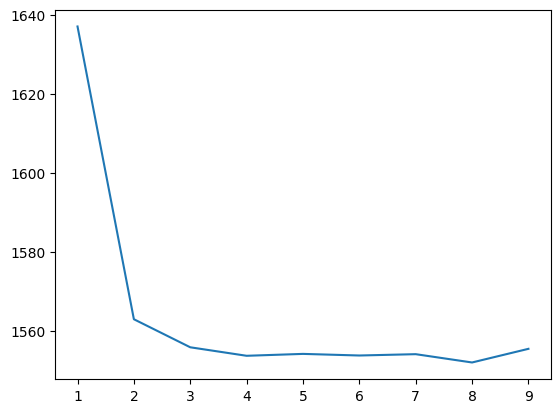

In [28]:
import sklearn as sk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print("hello")

wages = pd.read_csv("../datasets/Wage.csv")
wages = wages.sort_values('age')

#plt.scatter(wages['age'], wages['wage'])
#print(wages.head())

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

x = np.array(wages['age'].copy()).reshape((3000,1))
x_train, x_test, y_train, y_test = sk.model_selection.train_test_split(x, wages['wage'], train_size=0.8)

training_error = []
cross_validation_error = []

n_degrees = range(1,10)

for degree in n_degrees:
    poly_test = PolynomialFeatures(degree).fit_transform(x_test)
    poly_train = PolynomialFeatures(degree).fit_transform(x_train)
    lr = LinearRegression()
    model = lr.fit(poly_train, y_train)
    y_train_pred = model.predict(poly_train)
    mse = sk.metrics.mean_squared_error(y_train, y_train_pred)
    cve = sk.model_selection.cross_validate(lr, poly_train, y_train, scoring="neg_mean_squared_error", cv=5, return_train_score=True)
    training_error.append(mse)
    cross_validation_error.append(np.mean(np.absolute(cve['test_score'])))

plt.plot(n_degrees, cross_validation_error)

#plt.plot(mse, degree)
    #plt.plot(wages['age'], y_pred, color = 'red')
